In [13]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from datetime import datetime, timedelta
from datetime import datetime, timezone
from dateutil.tz import tzutc, tzlocal

In [14]:
##this code assumes that the rain gauges have a column named 'DateTime' and 'RF_mm'
##this code assumes that the stream gauges have a column named 'datetime' and metric_discharge_cms

# Check out Rain Gage Data

In [15]:
start_date = '2016-12-01'
end_date = '2016-12-05'

In [16]:
#path to script
script_path = Path(os.getcwd())

#folder data is in
Data = 'Hourly_Rainfall_Files'

#path to data
data_path = list(script_path.parts) + [Data] ; data_path = Path((os.path.join(*data_path)))
print('path to rain data:')
print(data_path)

#list of file names of data
data_file_list = sorted(os.listdir(data_path))

path to rain data:
C:\Users\bgorb\OneDrive\Documents\WMS_GSSHA\WMS_python\Rain_gauges_GSSHA\Hourly_Rainfall_Files


In [17]:
#create path to each rain file
rain_files_paths = []
for i in range(0,len(data_file_list)):
    rain_file = (os.path.join(*(list(data_path.parts) + ([data_file_list[i]]))))
    rain_files_paths.append(rain_file)

#get the names of each file
names_of_gages = data_file_list
for file in range(0, len(names_of_gages)):
    names_of_gages[file] = names_of_gages[file].replace('.csv', '')
names_of_gages 

['HI-41',
 'HI-45',
 'HanaleiEAST_radar',
 'HanaleiWEST_radar',
 'KPIH1',
 'PRIH1',
 'USC00514561',
 'USC00518165',
 'USGS_uv220356159281401',
 'USGS_uv220427159300201',
 'USGS_uv220443159235601',
 'USGS_uv221101159280801',
 'WUHH1']

In [18]:
#filter data so that it only has values for selected dates

rain_gage_dict = {}
for i in range(0, len(rain_files_paths)):
    rain_df= pd.DataFrame()
    rain_df = pd.read_csv(rain_files_paths[i])
    new_rain_df = pd.DataFrame()
    new_rain_df['DateTime'] = rain_df['DateTime']
    new_rain_df['RF_mm'] = rain_df['RF_mm']
    
    new_rain_df['DateTime'] = pd.to_datetime(new_rain_df['DateTime'])
    
    # Filter data between two dates
    filtered_df = new_rain_df.loc[(new_rain_df['DateTime'] >= start_date) 
                                    & (new_rain_df['DateTime'] <= end_date)]
    
    rain_gage_dict[names_of_gages[i]] = filtered_df

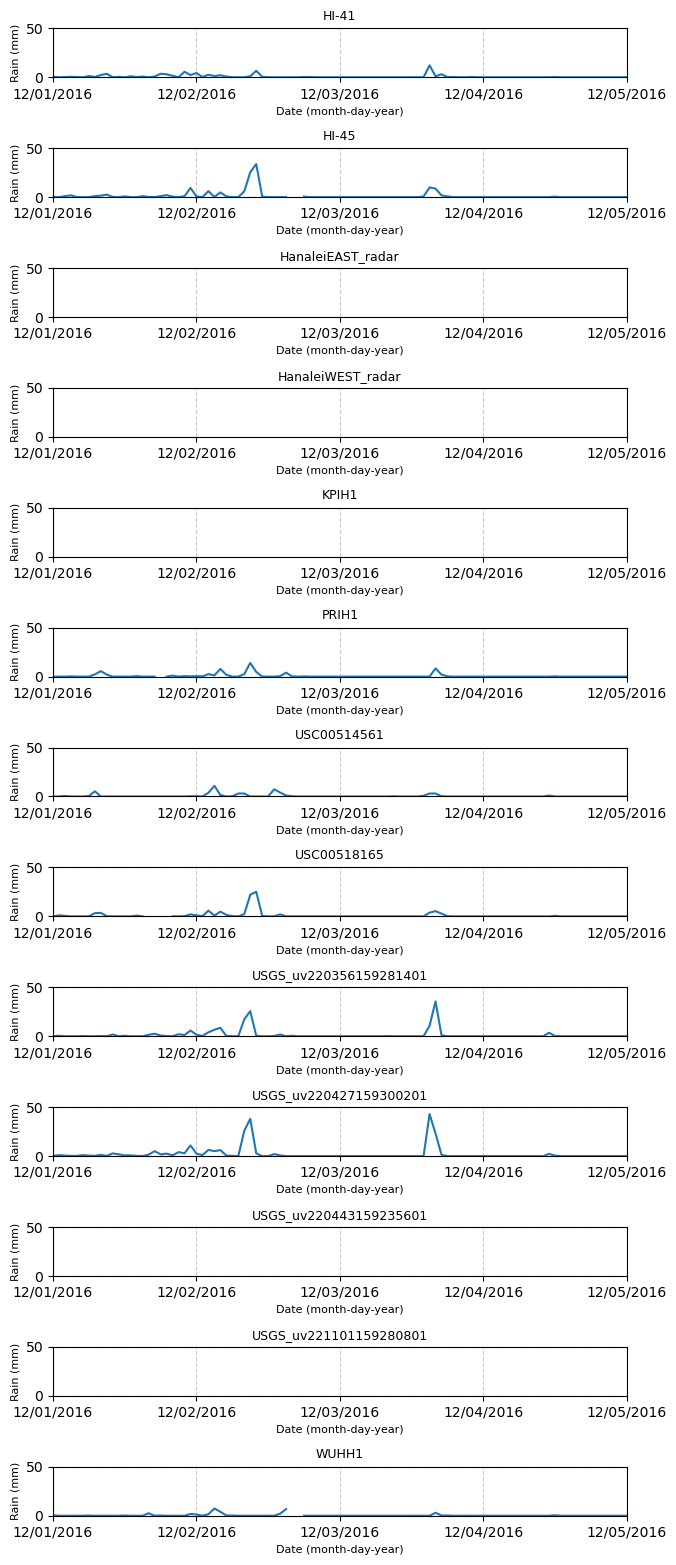

In [19]:
# all you have to do
#make a list of rain gage names called name_of_gages
#change this: rain_gage_dict[names_of_gages[i]] : data[i]
#say your list of dataframes is called 'data'
#call your big list data
#to call little list reference the index or 'i' int he for loop



fig, axs= plt.subplots(len(names_of_gages), figsize=(7,16))
fig.tight_layout(pad=3.0)

for i in range(0, len(names_of_gages)):
    axs[i].plot(rain_gage_dict[names_of_gages[i]]['DateTime'], rain_gage_dict[names_of_gages[i]]['RF_mm'])
    axs[i].set_title(names_of_gages[i], fontsize = 9)
    axs[i].set_xlim((rain_gage_dict[names_of_gages[0]]['DateTime'].min()), (rain_gage_dict[names_of_gages[0]]['DateTime'].max()))
    axs[i].set_xlabel('Date (month-day-year)', fontsize = 8)
    axs[i].set_ylabel('Rain (mm)', fontsize = 8)
    axs[i].grid()
    
    axs[i].set_ylim(0, 50)
    myFmt = DateFormatter("%m-%d-%y")
    axs[i].xaxis.set_major_formatter(myFmt)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    axs[i].xaxis.set_major_locator(mdates.DayLocator())
    plt.rc('axes', axisbelow=True)
    axs[i].grid(True, color='gray', linestyle='dashed', alpha = 0.4)

# Coimbine all gages into one data frame

In [8]:
#choose datetime from any data (they are all the same)
datetime = rain_gage_dict[names_of_gages[0]]['DateTime'].tolist()
dates_dict = {'DateTime' : datetime}
all_gages_in_df = pd.DataFrame(dates_dict)

In [9]:
for i in range(0 , len(names_of_gages)): 
    all_gages_in_df = pd.merge(all_gages_in_df, rain_gage_dict[names_of_gages[i]], on = "DateTime", how = "outer")
    all_gages_in_df[names_of_gages[i]] = all_gages_in_df['RF_mm']
    all_gages_in_df = all_gages_in_df.drop(['RF_mm'], axis=1)

In [10]:
all_gages_in_df.head(20)

DateTime  HI-41  HI-45  HanaleiEAST_radar  HanaleiWEST_radar  \
0  2018-11-14 00:00:00  0.000  0.000                NaN                NaN   
1  2018-11-14 01:00:00  0.000  0.000                NaN                NaN   
2  2018-11-14 02:00:00  0.000  0.000                NaN                NaN   
3  2018-11-14 03:00:00  0.000  0.000                NaN                NaN   
4  2018-11-14 04:00:00  0.000    NaN                NaN                NaN   
5  2018-11-14 05:00:00  0.000    NaN                NaN                NaN   
6  2018-11-14 06:00:00  0.000  0.000                NaN                NaN   
7  2018-11-14 07:00:00  0.000  0.000                NaN                NaN   
8  2018-11-14 08:00:00  0.000  0.000                NaN                NaN   
9  2018-11-14 09:00:00  0.254  0.000                NaN                NaN   
10 2018-11-14 10:00:00  0.254  0.000                NaN                NaN   
11 2018-11-14 11:00:00  0.254  0.254                NaN                NaN   
12 2018-11-14 12:00:00  0.000  0.508                NaN                NaN   
13 2018-11-14 13:00:00  0.254  0.254                NaN                NaN   
14 2018-11-14 14:00:00  0.254  0.000                NaN                NaN   
15 2018-11-14 15:00:00  0.762  0.254                NaN                NaN   
16 2018-11-14 16:00:00  0.000  0.000                NaN                NaN   
17 2018-11-14 17:00:00  0.254  0.000                NaN                NaN   
18 2018-11-14 18:00:00  0.000  0.000                NaN                NaN   
19 2018-11-14 19:00:00  0.000  0.000                NaN                NaN   

    KPIH1  PRIH1  USC00514561  USC00518165  USGS_uv220356159281401  \
0   0.000  0.000          NaN        0.000                   0.000   
1   0.000  0.000          NaN        0.000                   0.000   
2   0.000  0.000          NaN        0.000                   0.000   
3   0.000  0.000          NaN        0.000                   0.000   
4   0.508  0.000          NaN        0.000                   0.000   
5   0.000  0.000          NaN        0.000                   0.000   
6   0.000  0.000          NaN        0.000                   0.000   
7   0.000  0.000          NaN        0.000                   0.000   
8   0.000  0.000          NaN        0.000                   0.000   
9   0.254  0.000          NaN        0.000                   0.254   
10  0.000  0.254          NaN        0.508                   0.000   
11  0.254  0.000          NaN        0.254                   0.000   
12  0.762  1.524          NaN        1.016                   0.254   
13  0.000  0.000          NaN        0.000                   0.000   
14  0.000  0.000          NaN        0.000                   0.254   
15  0.000  0.000          NaN        0.000                   3.048   
16  0.000  0.000          NaN        0.000                   0.508   
17  0.000  0.000          NaN        0.000                   0.000   
18  0.000  0.000          NaN        0.000                   0.000   
19  0.000  0.000          NaN        0.000                   0.000   

    USGS_uv220427159300201  USGS_uv220443159235601  USGS_uv221101159280801  \
0                    0.000                     NaN                     NaN   
1                    0.000                     NaN                     NaN   
2                    0.000                     NaN                     NaN   
3                    0.000                     NaN                     NaN   
4                    0.000                     NaN                     NaN   
5                    0.000                     NaN                     NaN   
6                    0.254                     NaN                     NaN   
7                    0.000                     NaN                     NaN   
8                    0.000                     NaN                     NaN   
9                    0.000                     NaN                     NaN   
10                   0.254                    

In [11]:
#NOW export the dataframe and continue the calculations for missing rainfall values elsewhere...
export_name_r = start_date +'_' + end_date +'GSSHA_rain_gages_raw.csv'
#all_gages_in_df.to_csv(export_name_r)

# Obtain the MetaData for the Rain gages

In [12]:
Huang_paper_rain_gage_meta_data = pd.read_csv('metadata_pub_V20220401.csv')

rain_gages_interested_metadata = Huang_paper_rain_gage_meta_data.loc[Huang_paper_rain_gage_meta_data['FILENAME'].isin(names_of_gages)]
rain_gages_interested_metadata.reset_index().drop(['index'], axis= 1)

FILENAME                       STATION_NAME ISLAND  \
0                    HI-41                         PH WAINIHA  Kauai   
1                    HI-45                            HANALEI  Kauai   
2                    KPIH1                             KAPAHI  Kauai   
3                    PRIH1                PRINCEVILLE AIRPORT  Kauai   
4              USC00514561                            KILAUEA  Kauai   
5              USC00518165                  PRINCEVILLE RANCH  Kauai   
6   USGS_uv220356159281401  N WAILUA DITCH RAIN GAGE NR LIHUE  Kauai   
7   USGS_uv220427159300201   MT. WAIALEALE RAIN GAGE NR LIHUE  Kauai   
8   USGS_uv220443159235601      LB OPAEKAA RAIN GAGE NR KAPAA  Kauai   
9   USGS_uv221101159280801       HANALEI RAIN GAGE AT HANALEI  Kauai   
10                   WUHH1                  WAILUA UH EXP STN  Kauai   
11       HanaleiEAST_radar                            HANALEI  Kauai   
12       HanaleiWEST_radar                            HANALEI  Kauai   

          LAT         LON      ELEV_M  DATE_START    DATE_END  COMPLETENESS  \
0   22.196100 -159.556100    30.80000    2/4/1966  12/31/2020     93.303276   
1   22.198200 -159.495100     4.87680    4/1/1998  12/31/2020     82.319528   
2   22.102100 -159.385600   158.49600    7/1/1994  12/31/2020     83.698670   
3   22.211399 -159.443300    97.53600  11/23/2014  12/31/2020     94.279471   
4   22.213900 -159.404400   118.90000    2/3/1966    5/8/2018     87.555583   
5   22.218100 -159.482800    66.10000   3/18/1965  12/31/2020     89.992373   
6   22.062500 -159.467722   338.32800    7/5/2001  12/31/2020     98.720650   
7   22.070889 -159.497972  1569.72000   10/1/2007  12/31/2020     99.872616   
8   22.075611 -159.395889   139.72032   10/1/2007  10/26/2011    100.000000   
9   22.179583 -159.466389    18.28800   10/1/2007  10/25/2011     97.643164   
10  22.066099 -159.396000   158.00000    7/1/1994  12/31/2020     89.512058   
11  22.150000 -159.434998         NaN    1/1/2016  12/31/2020           NaN   
12  22.164999 -159.485001         NaN    1/1/2016  12/31/2020           NaN   

                    SOURCES       CORR_FLAG  
0   NCEI_COOPV2; UaHydroNet  Not applicable  
1                UaHydroNet            Pass  
2          UaHydroNet; HADS            Pass  
3          UaHydroNet; HADS            Pass  
4               NCEI_COOPV2            Pass  
5               NCEI_COOPV2            Pass  
6                USGS; HADS            Pass  
7                USGS; HADS            Pass  
8                      USGS            Pass  
9                      USGS            Pass  
10         UaHydroNet; HADS            Pass  
11                      NaN             NaN  
12                      NaN             NaN

In [13]:
export_name_meta = start_date +'_' + end_date +'GSSHA_rain_gage_meta.csv'
#rain_gages_interested_metadata.to_csv(export_name_meta)

# Stream Data

In [41]:
#function I made to deal with weird GMT times in observed streamflow
def GMT_to_Hawaii(Gage_File):
    # hawaii time is -10 hours from standard GMT time
    Hawaii_time = timezone(timedelta(hours = -10, minutes = 0))

    #read in Gage_File
    df_obs = pd.read_csv(Gage_File)

    #set to datetime to a utc timestamp
    df_obs['datetime'] = pd.to_datetime(df_obs['datetime'])

    #set the datetime to a local timestamp for hawaii (gmt -10 hours)
    for i in range(len(df_obs)):
        df_obs['datetime'][i] = df_obs['datetime'][i].astimezone(Hawaii_time)

    #set to index for merging and get rid of the local timestamp thing   
    df_obs = df_obs.set_index('datetime')
    df_obs.index = df_obs.index.tz_localize(None)
    df_obs = df_obs.reset_index()

    return df_obs

In [42]:
#folder data is in
Stream_Data = 'Stream_Files'

#path to data
stream_data_path = list(script_path.parts) + [Stream_Data] 
stream_data_path = Path((os.path.join(*stream_data_path)))

#list of file names of data
stream_file_list = os.listdir(stream_data_path)

stream_file = (os.path.join(*(list(stream_data_path.parts) + ([stream_file_list[0]]))))

In [52]:
stream_df = pd.read_csv(stream_file)

#create a new_stream_df
new_stream_df = pd.DataFrame()
new_stream_df['datetime'] = stream_df['datetime']
new_stream_df['metric_discharge_cms'] = stream_df['metric_discharge_cms']
new_stream_df['metric_height_m'] = stream_df['metric_height_m']

# Convert the date to datetime64
new_stream_df['datetime'] = pd.to_datetime(new_stream_df['datetime'])

C:\Users\bgorb\AppData\Local\Temp\ipykernel_19428\2985141185.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  stream_df = pd.read_csv(stream_file)


In [53]:
filtered_df

datetime  metric_discharge_cms  metric_height_m
673825 2017-11-28 00:00:00             22.370309         1.243584
673826 2017-11-28 00:05:00             22.370309         1.243584
673827 2017-11-28 00:10:00             22.370309         1.243584
673828 2017-11-28 00:15:00             22.058823         1.240536
673829 2017-11-28 00:20:00             21.747338         1.237488
...                    ...                   ...              ...
674935 2017-12-01 23:35:00             26.447935         1.258824
674936 2017-12-01 23:40:00             27.608925         1.271016
674937 2017-12-01 23:45:00             28.203579         1.277112
674938 2017-12-01 23:50:00             28.883184         1.283208
674939 2017-12-01 23:55:00             29.166352         1.286256

[1115 rows x 3 columns]

Text(0.5, 1.0, 'Discharge (cms)')

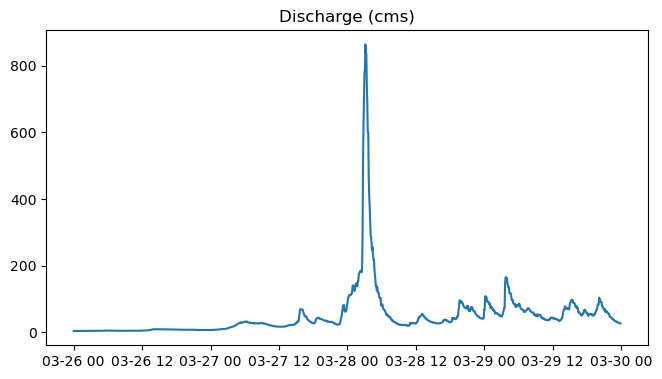

In [54]:
# Filter data between two dates
filtered_df = new_stream_df.loc[(new_stream_df['datetime'] >= start_date)
                     & (new_stream_df['datetime'] < end_date)]

#see what it looks like...
fig, axs= plt.subplots(1,figsize=(7,4))
fig.tight_layout(pad=2.0)

axs.plot(filtered_df['datetime'], filtered_df['metric_discharge_cms'])
axs.set_title('Discharge (cms)')

# axs[1].plot(filtered_df['datetime'], filtered_df['metric_height_m'])
# axs[1].set_title('Gage Height (m)')

In [55]:
def get_minute_acc(streamflow_file, start_date, end_date):
    
    #read in the raw streamflow file (ALREADY CONVERTED TO HAWAII TIME)
    raw_str = pd.read_csv(streamflow_file)
    raw_str['datetime'] = pd.to_datetime(raw_str['datetime'])
    
    #filter the streamflow file to the dates you want
    filtered_str = raw_str.loc[(raw_str['datetime'] >= start_date) & (raw_str['datetime'] <= end_date)]
    filtered_str = filtered_str.reset_index()
    filtered_str['datetime'] = pd.to_datetime(filtered_str['datetime'])
    filtered_str = filtered_str.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'index']) #delete the nonsense
    
    #calculated the minutes between different measurements
    filtered_str['minutes'] = np.nan
    for i in range(len(filtered_str)):
        if i == 0:
            filtered_str['minutes'][i] = 0
        else:
            filtered_str['minutes'][i] = (filtered_str['datetime'][i] - filtered_str['datetime'][i-1]).total_seconds()/60
    
    #accumulate the time to get the minutes for GSSHA input
    filtered_str['accumulated_minutes'] = np.nan
    for i in range(len(filtered_str)):
        if i == 0:
            filtered_str['accumulated_minutes'][i] = 0
        else:
            filtered_str['accumulated_minutes'][i] = filtered_str['minutes'][0:i+1].sum()
    
    return filtered_str

In [56]:
str_data = get_minute_acc(stream_file, start_date, end_date)

C:\Users\bgorb\AppData\Local\Temp\ipykernel_19428\4099467562.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_str = pd.read_csv(streamflow_file)
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19428\4099467562.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_str['minutes'][i] = 0
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19428\4099467562.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_str['minutes'][i] = (filtered_str['datetime'][i] - filtered_str['datetime'][i-1]).total_seconds()/60
C:\Users\bgorb\AppData\Local\Temp\ipykernel_19428

In [57]:
export_name_s = start_date +'_' + end_date +'GSSHA_stream_gage.csv'

# EXPORT THE DATA

In [58]:
str_data.to_csv(export_name_s)
all_gages_in_df.to_csv(export_name_r)
rain_gages_interested_metadata.to_csv(export_name_meta)